<a href="https://colab.research.google.com/github/mzignis/advance_house_pricing/blob/master/preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
HOME = '/content/drive/My Drive/ml_competition/advance_house_pricing'
%cd $HOME

/content/drive/My Drive/ml_competition/advance_house_pricing


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Getting data

In [3]:
DATA_DIR = os.path.join(HOME, 'data')
os.listdir(DATA_DIR)

['test.csv',
 'sample_submission.csv',
 'data_description.txt',
 'train.csv',
 'preprocessed',
 'results']

In [4]:
train_data = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'), index_col=0)
test_data = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'), index_col=0)

In [5]:
train_data.shape

(1460, 80)

In [6]:
test_data.shape

(1459, 79)

## Exploring data

In [7]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
train_numeric_features = [x for x in train_data.columns if train_data.dtypes[x] in [np.float64, np.int64]]
train_text_features = [x for x in train_data.columns if train_data.dtypes[x] == object]
len(train_numeric_features + train_text_features)

80

In [10]:
test_numeric_features = [x for x in test_data.columns if test_data.dtypes[x] in [np.float64, np.int64]]
test_text_features = [x for x in test_data.columns if test_data.dtypes[x] == object]
len(test_numeric_features + test_text_features)

79

### Inspect numeric values

In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9279da8a20>,
      dtype=object)

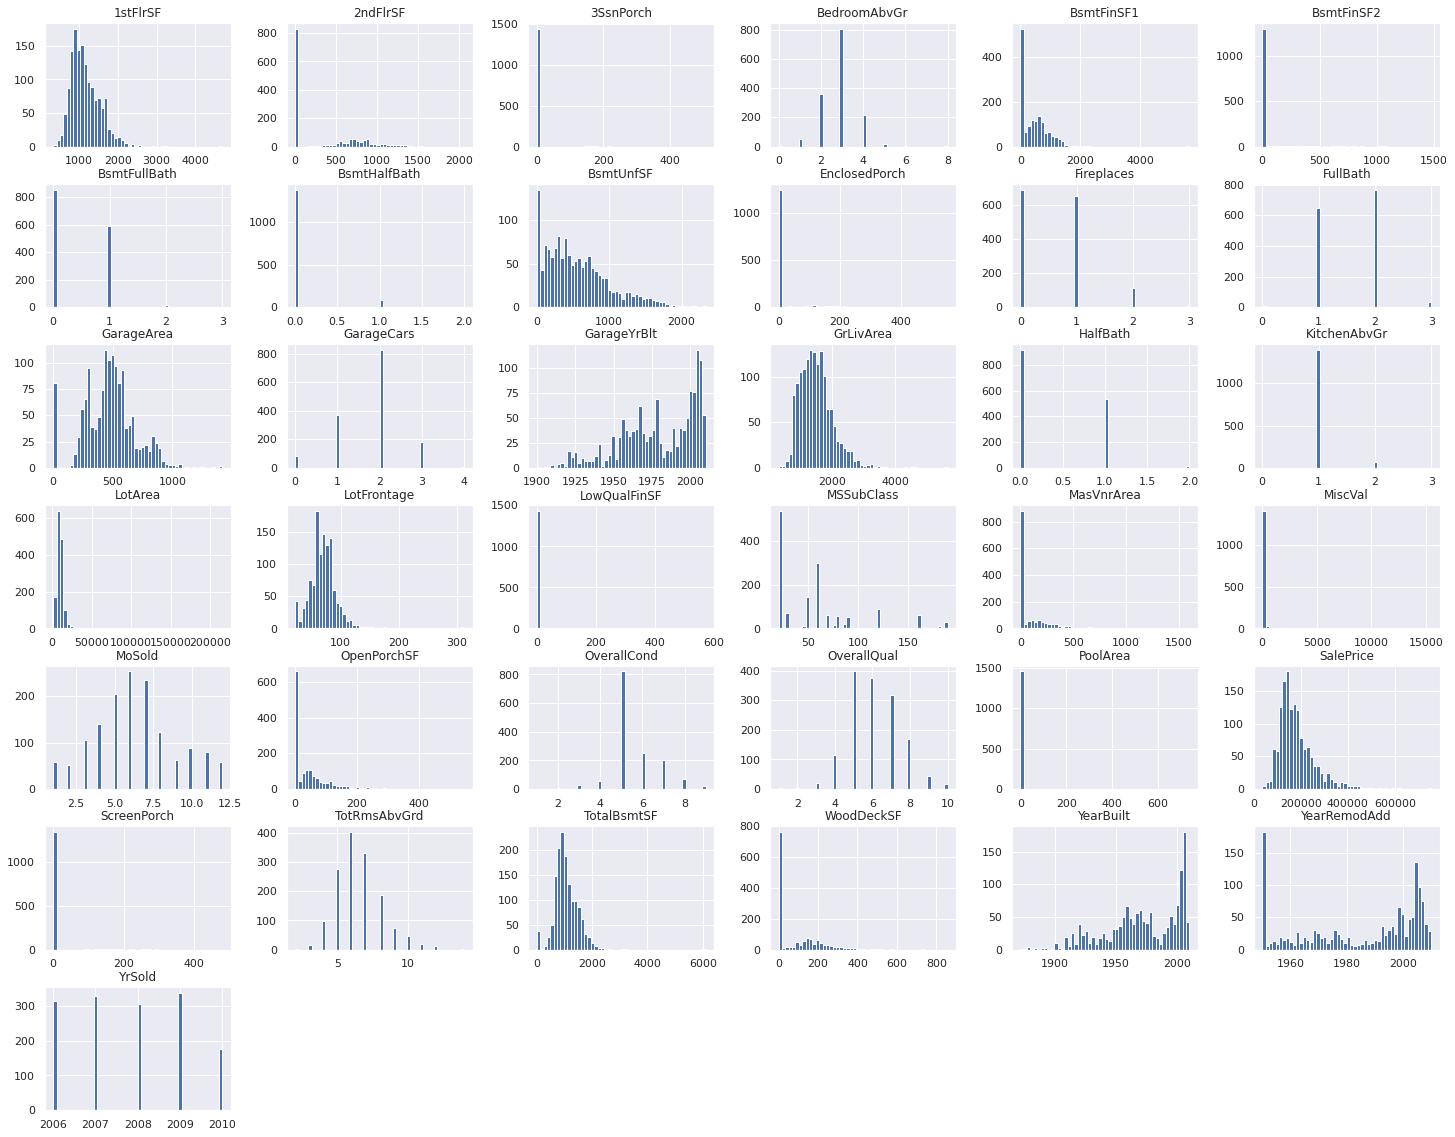

In [12]:
train_data[train_numeric_features].hist(bins=50, figsize=(25, 20))

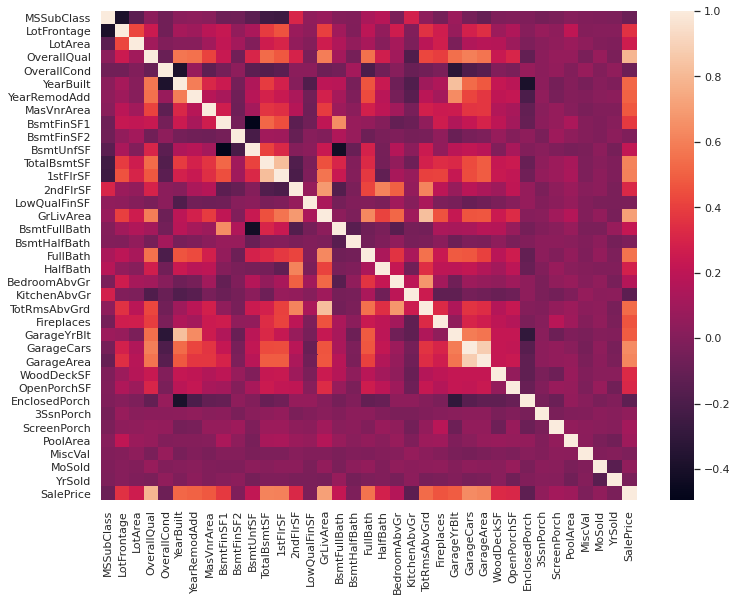

In [13]:
plt.figure(figsize=(12, 9))
corr = train_data[train_numeric_features].corr()
sns.heatmap(corr)

### Inspect text features

In [14]:
for feature in train_text_features:
    print(feature)
    print(train_data[feature].value_counts())
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn

In [15]:
for feature in test_text_features:
    print(feature)
    print(test_data[feature].value_counts())
    print()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

Street
Pave    1453
Grvl       6
Name: Street, dtype: int64

Alley
Grvl    70
Pave    37
Name: Alley, dtype: int64

LotShape
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

LandContour
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64

Utilities
AllPub    1457
Name: Utilities, dtype: int64

LotConfig
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

LandSlope
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

Neighborhood
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill

## Preprocessing data

### Missing values

#### Removing columns with 70% of missing data

In [16]:
threshold = 0.7
train_data_rows = train_data.shape[0]
test_data_rows = test_data.shape[0]
columns = train_data.columns

In [17]:
train_missing_values = train_data.isna().sum()
train_reject_features = [columns[col] for col, x in enumerate(train_missing_values) if x / train_data_rows > threshold]
train_reject_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [18]:
test_missing_values = test_data.isna().sum()
test_reject_features = [columns[col] for col, x in enumerate(test_missing_values) if x / test_data_rows > threshold]
test_reject_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [19]:
features_to_remove = set(train_reject_features + test_reject_features)
features_to_remove

{'Alley', 'Fence', 'MiscFeature', 'PoolQC'}

In [20]:
for feature in features_to_remove:
    try:
        train_text_features.remove(feature)
        test_text_features.remove(feature)
    except:
        pass

for feature in features_to_remove:
    try:
        train_text_features.remove(feature)
        test_text_features.remove(feature)
    except:
        pass

In [21]:
train_data = train_data[[x for x in train_data.columns if x not in features_to_remove]]
test_data = test_data[[x for x in test_data.columns if x not in features_to_remove]]
train_data.shape, test_data.shape

((1460, 76), (1459, 75))

#### Removing rows with 70% of missing data


In [22]:
train_data = train_data.loc[train_data.isnull().mean(axis=1) < threshold]
test_data = test_data.loc[test_data.isnull().mean(axis=1) < threshold]
train_data.shape, test_data.shape

((1460, 76), (1459, 75))

### Filling missing data

#### Numeric features

In [23]:
train_numeric_features_missing = [x for x in train_data[train_numeric_features] if train_data[x].isna().sum()]
train_numeric_features_missing

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [24]:
test_numeric_features_missing = [x for x in test_data[test_numeric_features] if test_data[x].isna().sum()]
test_numeric_features_missing

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [25]:
numeric_feature_missing = set(train_numeric_features_missing + test_numeric_features_missing)
numeric_feature_missing

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF'}

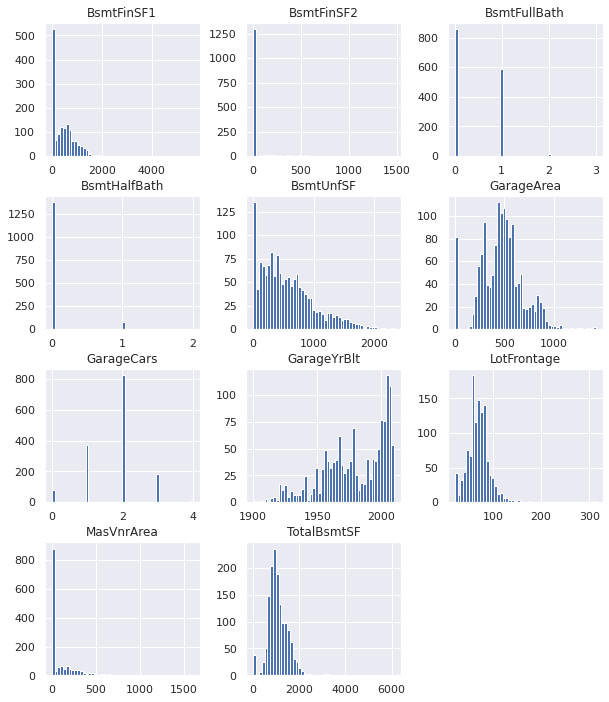

In [26]:
figure = train_data[numeric_feature_missing].hist(bins=50, figsize=(10, 12))
plt.show()

##### Filling with mode

In [27]:
features_ = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'GarageCars']
for feature in features_:
    mode = train_data[feature].mode()[0]
    train_data[feature] = train_data[feature].fillna(mode)
    test_data[feature] = test_data[feature].fillna(mode)

In [28]:
train_data[features_].isna().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
MasVnrArea      0
GarageCars      0
dtype: int64

In [29]:
test_data[features_].isna().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
MasVnrArea      0
GarageCars      0
dtype: int64

##### Filling with zero


In [30]:
features_ = ['BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt']
for feature in features_:
    train_data[feature] = train_data[feature].fillna(0)
    test_data[feature] = test_data[feature].fillna(0)

In [31]:
train_data[features_].isna().sum()

BsmtUnfSF      0
TotalBsmtSF    0
GarageYrBlt    0
dtype: int64

In [32]:
test_data[features_].isna().sum()

BsmtUnfSF      0
TotalBsmtSF    0
GarageYrBlt    0
dtype: int64

##### Fill with mean

In [33]:
train_data[['GarageType', 'GarageArea']][train_data['GarageArea'].isna()]

,GarageType,GarageArea
Id,,


In [34]:
test_data[['GarageType', 'GarageArea',]][test_data['GarageArea'].isna()]

,GarageType,GarageArea
Id,,
2577,Detchd,NaN


In [35]:
garage_area_mean = train_data[train_data['GarageType'] == 'Detchd']['GarageArea'].mean()

train_data['GarageArea'].fillna(garage_area_mean, inplace=True)
test_data['GarageArea'].fillna(garage_area_mean, inplace=True)

In [36]:
test_data[['GarageType', 'GarageArea',]][test_data['GarageArea'].isna()]

,GarageType,GarageArea
Id,,


##### Fill with median

In [37]:
lot_frontage_median = train_data['LotFrontage'].median()
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(lot_frontage_median)
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(lot_frontage_median)

In [38]:
train_data['LotFrontage'].isna().sum()

0

In [39]:
test_data['LotFrontage'].isna().sum()

0

##### Check if everything was filled

In [40]:
train_numeric_features_missing = [x for x in train_data[train_numeric_features] if train_data[x].isna().sum()]
train_numeric_features_missing

[]

In [41]:
test_numeric_features_missing = [x for x in test_data[test_numeric_features] if test_data[x].isna().sum()]
test_numeric_features_missing

[]

#### Text data

In [42]:
train_text_features_missing = [x for x in train_data[train_text_features] if train_data[x].isna().sum()]
train_text_features_missing

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [43]:
test_text_features_missing = [x for x in test_data[test_text_features] if test_data[x].isna().sum()]
test_text_features_missing

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [44]:
text_feature_missing = set(train_text_features_missing + test_text_features_missing)
text_feature_missing

{'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'KitchenQual',
 'MSZoning',
 'MasVnrType',
 'SaleType',
 'Utilities'}

##### Oridnal missing features - filling with mode

In [45]:
features_ = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MSZoning', 
             'MasVnrType', 'SaleType', 'Utilities']

for feature in features_:
    mode = train_data[feature].mode()[0]
    train_data[feature] = train_data[feature].fillna(mode)
    test_data[feature] = test_data[feature].fillna(mode) 

In [46]:
train_data[features_].isna().sum()

Electrical     0
Exterior1st    0
Exterior2nd    0
Functional     0
KitchenQual    0
MSZoning       0
MasVnrType     0
SaleType       0
Utilities      0
dtype: int64

In [47]:
test_data[features_].isna().sum()

Electrical     0
Exterior1st    0
Exterior2nd    0
Functional     0
KitchenQual    0
MSZoning       0
MasVnrType     0
SaleType       0
Utilities      0
dtype: int64

##### NaN == Lack of ... 
 NaN should be equal to "lack of ..."

In [48]:
features_ = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 
             'FireplaceQu', 
             'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']

###### Fireplace

In [49]:
fireplaces_df = train_data[['Fireplaces', 'FireplaceQu']][train_data['FireplaceQu'].isna()]
fireplaces_df['Fireplaces'].sum()

0

In [50]:
fireplaces_df = test_data[['Fireplaces', 'FireplaceQu']][test_data['FireplaceQu'].isna()]
fireplaces_df['Fireplaces'].sum()

0

In [51]:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NoFireplace')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NoFireplace')

In [52]:
train_data['FireplaceQu'].isna().sum()

0

In [53]:
test_data['FireplaceQu'].isna().sum()

0

###### Basement

In [54]:
bsmt_features = [x for x in train_data.columns if 'Bsmt' in x]
bsmt_features

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [55]:
bsmt_missing_features = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']
bsmt_missing_features

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']

In [56]:
def fill_values(df, features, boundry_feature):
    df = df.copy()
    for feature in features:
        for idx, row in df[df[feature].isna()].iterrows():
            if row[boundry_feature] > 0:
                filling_value = df[feature].mode()[0]
            else:
                filling_value = 'NoBasement'
            df.loc[idx, feature] = filling_value

    return df

train_data = fill_values(train_data, bsmt_missing_features, 'TotalBsmtSF')
test_data = fill_values(test_data, bsmt_missing_features, 'TotalBsmtSF')

In [57]:
train_data[bsmt_features][train_data['BsmtCond'].isna()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,


In [58]:
test_data[bsmt_features][test_data['BsmtFinType1'].isna()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,


###### Garage


In [59]:
garage_features = [x for x in train_data.columns if 'Garage' in x]
garage_features

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [60]:
garage_missing_features = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']
garage_missing_features

['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']

In [61]:
train_data = fill_values(train_data, garage_missing_features, 'GarageArea')
test_data = fill_values(test_data, garage_missing_features, 'GarageArea')

In [62]:
train_data[garage_features][train_data['GarageQual'].isna()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,


In [63]:
test_data[garage_features][test_data['GarageQual'].isna()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,


##### Check if everything was filled

In [64]:
train_text_features_missing = [x for x in train_data[train_text_features] if train_data[x].isna().sum()]
train_text_features_missing

[]

In [65]:
test_text_features_missing = [x for x in test_data[test_text_features] if test_data[x].isna().sum()]
test_text_features_missing

[]